In [91]:
import heapq
import weightedGraph 
import time
import random
import matplotlib.pyplot as plt

In [64]:
# Менш ефективна реалізація за рахунок лінійного пошуку
def dijkstra(graph: weightedGraph, start: int):
    """
    Реалізація алгоритму Дейкстри для графа з вершинами, що індексуються з 1.

    graph: об'єкт класу weightedGraph, який представляє зважений граф
    start: стартова вершина (індексується з 1)
    return: два словники - distances (мінімальні відстані) та previous (попередники на шляху), час
    """
    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()
    
    n = graph.num_vertices
    # Ініціалізуємо словник відстаней до всіх вершин значенням 'inf' (нескінченність)
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини 0
    
    # Ініціалізуємо словник попередників для відновлення шляху
    previous = {vertex: None for vertex in range(1, n + 1)}
    
    # Масив для відмітки відвіданих вершин
    visited = [False] * (n + 1)
    current_vertex = start  # Починаємо зі стартової вершини

    while True:
        # Оновлюємо відстані для сусідів поточної вершини
        for neighbor, weight in graph.graph[current_vertex]:
            if visited[neighbor]:
                continue  # Пропускаємо вже відвідані вершини

            # Обчислюємо нову відстань до сусіда
            new_distance = distances[current_vertex] + weight
            # Якщо новий шлях коротший, оновлюємо відстань і попередника
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_vertex

        # Позначаємо поточну вершину як відвідану
        visited[current_vertex] = True

        # Шукаємо наступну вершину з найменшою відстанню
        next_vertex = None
        min_distance = float('inf')
        for vertex in range(1, n + 1):
            # Вибираємо невідвідану вершину з мінімальною відстанню
            if not visited[vertex] and distances[vertex] < min_distance:
                min_distance = distances[vertex]
                next_vertex = vertex

        if next_vertex is None:
            # Якщо більше немає вершин для обробки, виходимо з циклу
            break

        # Переходимо до наступної вершини
        current_vertex = next_vertex
     
    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    return distances, previous, total_time



In [65]:
import heapq

In [66]:
import heapq

def dijkstra_h(graph: weightedGraph, start: int):
    """
    Реалізація алгоритму Дейкстри для графа з використанням черги з пріоритетом (мін-купи).

    :param graph: об'єкт класу weightedGraph
    :param start: стартова вершина (індексується з 1)
    :return: два словники - distances (мінімальні відстані) та previous (попередники на шляху)
    """

    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    n = graph.num_vertices  # Кількість вершин у графі
    
    # Ініціалізуємо словник мінімальних відстаней до кожної вершини значенням 'inf' (нескінченність)
    distances = {v: float('inf') for v in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    
    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {v: None for v in range(1, n + 1)}
    
    # Масив для відмітки відвіданих вершин
    visited = [False] * (n + 1)
    
    # Черга з пріоритетом (мін-купа), яка буде зберігати вершини для обробки
    priority_queue = [(0, start)]  # (поточна відстань, вершина)

    while priority_queue:
        # Вибираємо вершину з мінімальною відстанню (дістаємо з мін-купи)
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # Пропускаємо вершину, якщо вона вже була відвідана
        if visited[current_vertex]:
            continue

        # Позначаємо поточну вершину як відвідану
        visited[current_vertex] = True

        # Оновлюємо відстані для сусідів поточної вершини
        for neighbor, weight in graph.graph[current_vertex]:
            if visited[neighbor]:
                continue  # Пропускаємо вже відвідані вершини

            # Обчислюємо нову можливу відстань до сусіда через поточну вершину
            new_distance = current_distance + weight

            # Якщо новий шлях коротший, оновлюємо відстань і попередника
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_vertex
                # Додаємо сусіда до черги з пріоритетом з новою відстанню
                heapq.heappush(priority_queue, (new_distance, neighbor))

    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    return distances, previous, total_time


In [67]:
def dijkstra_m(graph: weightedGraph, start: int):
    """
    Реалізація алгоритму Дейкстри для графа, представленого матрицею суміжності.
    
    :param graph: об'єкт класу weightedGraph, який представляє матрицю суміжності
    :param start: стартова вершина (індексується з 1)
    :return: два словники - distances (мінімальні відстані до вершин) та previous (попередники на шляху)
    """
    # Перетворюємо граф у матрицю суміжності
    graph = graph.to_adjacency_matrix()

    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    n = len(graph)  # Кількість вершин у графі
    
    # Ініціалізуємо словник мінімальних відстаней до кожної вершини значенням 'inf' (нескінченність)
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    
    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {vertex: None for vertex in range(1, n + 1)}
    
    # Масив для відмітки відвіданих вершин
    visited = [False] * (n + 1)

    current_vertex = start  # Починаємо з початкової вершини

    while True:
        # Оновлюємо відстані для всіх сусідів поточної вершини
        for neighbor in range(1, n + 1):
            if visited[neighbor]:
                continue  # Пропускаємо вже відвідані вершини

            # Отримуємо вагу ребра між поточною вершиною і сусідом (індексація з 0 для матриці)
            weight = graph[current_vertex - 1][neighbor - 1]
            if weight == float('inf'):  # Якщо немає ребра, пропускаємо
                continue

            # Обчислюємо нову можливу відстань до сусіда через поточну вершину
            new_distance = distances[current_vertex] + weight

            # Якщо новий шлях коротший, оновлюємо відстань і попередника
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_vertex

        # Позначаємо поточну вершину як відвідану
        visited[current_vertex] = True

        # Шукаємо наступну вершину з мінімальною відстанню
        next_vertex = None
        min_distance = float('inf')
        for vertex in range(1, n + 1):
            if not visited[vertex] and distances[vertex] < min_distance:
                min_distance = distances[vertex]
                next_vertex = vertex

        # Якщо немає більше вершин для обробки, виходимо з циклу
        if next_vertex is None:
            break

        # Переходимо до наступної вершини
        current_vertex = next_vertex

    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    return distances, previous, total_time


In [68]:
import heapq

def dijkstra_mh(graph: weightedGraph, start: int):
    """
    Реалізація алгоритму Дейкстри для графа, представленого матрицею суміжності,
    з використанням черги з пріоритетом для покращення ефективності.

    :param graph: об'єкт класу weightedGraph, який представляє матрицю суміжності
    :param start: стартова вершина (індексується з 1)
    :return: два словники - distances (мінімальні відстані до вершин) та previous (попередники на шляху)
    """
    # Перетворюємо граф у матрицю суміжності
    graph = graph.to_adjacency_matrix()

    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    n = len(graph)  # Кількість вершин у графі
    
    # Ініціалізуємо словник мінімальних відстаней до кожної вершини значенням 'inf'
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    
    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {vertex: None for vertex in range(1, n + 1)}
    
    # Черга з пріоритетом для вибору вершин з мінімальною відстанню
    priority_queue = [(0, start)]  # (distance, vertex)
    
    visited = [False] * (n + 1)  # Масив для відмітки відвіданих вершин

    while priority_queue:
        # Вибираємо вершину з мінімальною відстанню
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        if visited[current_vertex]:
            continue  # Пропускаємо вже відвідані вершини

        # Позначаємо поточну вершину як відвідану
        visited[current_vertex] = True
        
        # Оновлюємо відстані для всіх сусідів поточної вершини
        for neighbor in range(1, n + 1):
            weight = graph[current_vertex - 1][neighbor - 1]  # Вага ребра
            if weight == float('inf') or visited[neighbor]:  # Пропускаємо, якщо немає ребра або вершина відвідана
                continue

            new_distance = current_distance + weight  # Обчислюємо нову можливу відстань
            
            if new_distance < distances[neighbor]:  # Якщо новий шлях коротший
                distances[neighbor] = new_distance
                previous[neighbor] = current_vertex
                heapq.heappush(priority_queue, (new_distance, neighbor))  # Додаємо сусіда до черги з новою відстанню

    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    return distances, previous, total_time


In [69]:
n = 5
p = 0.7 
random_graph = weightedGraph.randomWeightedGraph(n, p)

In [70]:
paths = dijkstra(random_graph, 1)
paths_h = dijkstra_h(random_graph, 1)

In [71]:
paths == paths_h

True

In [72]:
for i in range (500+1):
    n = 5
    p = 0.5 
    random_graph = weightedGraph.randomWeightedGraph(n, p)
    paths = dijkstra(random_graph, 1)
    paths_h = dijkstra_h(random_graph, 1)
    paths_m = dijkstra_m(random_graph, 1)
    if paths != paths_h:
        print("ups1")
        print(paths, paths_h)
    if paths != paths_m:
        print("Ups2")
        print(paths[0], paths_m[0])
        

ups1
({1: 0, 2: 1, 3: 9, 4: 4, 5: 4}, {1: None, 2: 1, 3: 2, 4: 1, 5: 2}, 0.0009963512420654297) ({1: 0, 2: 1, 3: 9, 4: 4, 5: 4}, {1: None, 2: 1, 3: 2, 4: 1, 5: 2}, 0.0)
Ups2
{1: 0, 2: 1, 3: 9, 4: 4, 5: 4} {1: 0, 2: 1, 3: 9, 4: 4, 5: 4}
Ups2
{1: 0, 2: 9, 3: 6, 4: 12, 5: 10} {1: 0, 2: 9, 3: 6, 4: 12, 5: 10}
ups1
({1: 0, 2: inf, 3: 6, 4: 9, 5: 19}, {1: None, 2: None, 3: 1, 4: 1, 5: 4}, 0.0009989738464355469) ({1: 0, 2: inf, 3: 6, 4: 9, 5: 19}, {1: None, 2: None, 3: 1, 4: 1, 5: 4}, 0.0)
Ups2
{1: 0, 2: inf, 3: 6, 4: 9, 5: 19} {1: 0, 2: inf, 3: 6, 4: 9, 5: 19}
Ups2
{1: 0, 2: inf, 3: 17, 4: 14, 5: 9} {1: 0, 2: inf, 3: 17, 4: 14, 5: 9}
ups1
({1: 0, 2: 2, 3: 5, 4: 4, 5: 4}, {1: None, 2: 1, 3: 5, 4: 1, 5: 2}, 0.000997781753540039) ({1: 0, 2: 2, 3: 5, 4: 4, 5: 4}, {1: None, 2: 1, 3: 5, 4: 1, 5: 2}, 0.0)
Ups2
{1: 0, 2: 2, 3: 5, 4: 4, 5: 4} {1: 0, 2: 2, 3: 5, 4: 4, 5: 4}
ups1
({1: 0, 2: 5, 3: 10, 4: 9, 5: 6}, {1: None, 2: 1, 3: 4, 4: 2, 5: 1}, 0.0009627342224121094) ({1: 0, 2: 5, 3: 10, 4: 9, 5: 6}

In [73]:
random_graph.to_adjacency_matrix()

[[0, 1, 2, 3, 3],
 [1, 0, 5, 3, inf],
 [2, 5, 0, inf, inf],
 [3, 3, inf, 0, inf],
 [3, inf, inf, inf, 0]]

In [74]:
random_graph.show()

1: [(2, 1), (3, 2), (4, 3), (5, 3)]
2: [(1, 1), (3, 5), (4, 3)]
3: [(1, 2), (2, 5)]
4: [(1, 3), (2, 3)]
5: [(1, 3)]


In [75]:
def bellman_ford(graph, start):
    """
    Алгоритм Беллмана-Форда для графа, представленного списком суміжності.
    
    :param graph: словник, представляючий граф як список суміжності {вершина: [(сосід, вага)]}
    :param start: стартова вершина
    :return: словник відстаней до всіх вершин, попередні вершини, True якщо знайдено від'ємний цикл
    """

    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    # Ініціалізуємо відстані до всіх вершин значенням 'inf' (нескінченність)
    n = graph.num_vertices  # Отримуємо кількість вершин у графі
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}  # Відстані до вершин
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    graph = graph.graph  # Отримуємо список суміжності графа

    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {vertex: None for vertex in range(1, n + 1)}

    for _ in range(n - 1):
        for vertex in graph:  # Проходимо по всім вершинам графа
            for neighbor, weight in graph[vertex]:  # Проходимо по сусідам та їх вагам
                # Якщо нова відстань менша, оновлюємо відстань і попередника
                if distances[vertex] + weight < distances[neighbor]:
                    distances[neighbor] = distances[vertex] + weight
                    previous[neighbor] = vertex

    # Перевіряємо на наявність від'ємних циклів
    for vertex in graph:
        for neighbor, weight in graph[vertex]:
            # Якщо можемо ще більше зменшити відстань, то знайдений від'ємний цикл
            if distances[vertex] + weight < distances[neighbor]:
                print("Negative Cycle")
                return distances, previous, True  # Повертаємо True якщо знайдено від'ємний цикл

    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time

    
    return distances, previous, False, total_time



In [76]:
def bellman_ford_matrix(graph, start):
    """
    Алгоритм Беллмана-Форда для графа, представленного матрицею суміжності.
    
    :param graph: двумірний масив, що представляє матрицю суміжності
    :param start: стартова вершина
    :return: словник відстаней до всіх вершин, попередні вершини, True якщо знайдено від'ємний цикл
    """
    # Починаємо вимір часу виконання алгоритму.
    start_time = time.time()

    # Перетворюємо граф у матрицю суміжності
    graph = graph.to_adjacency_matrix()

    n = len(graph)  # Кількість вершин у графі
    
    # Ініціалізуємо відстані до всіх вершин значенням 'inf' (нескінченність)
    distances = {vertex: float('inf') for vertex in range(1, n + 1)}
    distances[start] = 0  # Відстань до стартової вершини дорівнює 0
    
    # Ініціалізуємо словник попередників для відновлення шляхів
    previous = {vertex: None for vertex in range(1, n + 1)}
    
    for _ in range(n - 1):
        for u in range(n):  # Проходимо по всім вершинам графа
            for v in range(n):  # Проходимо по всім сусідам
                weight = graph[u][v]  # Отримуємо вагу ребра між вершинами u та v
                # Якщо вага не є 'inf' (немає ребра) і нова відстань менша, оновлюємо відстань і попередника
                if weight != float('inf') and distances[u + 1] + weight < distances[v + 1]:
                    distances[v + 1] = distances[u + 1] + weight
                    previous[v + 1] = u + 1  # Зберігаємо попередню вершину
    
    # Перевіряємо на наявність від'ємних циклів
    for u in range(n):
        for v in range(n):
            weight = graph[u][v]  # Отримуємо вагу ребра
            # Якщо можемо ще більше зменшити відстань, то знайдений від'ємний цикл
            if weight != float('inf') and distances[u + 1] + weight < distances[v + 1]:
                print("Negative Cycle")  # Виводимо повідомлення про від'ємний цикл
                return distances, previous, True  # Повертаємо True, якщо знайдено від'ємний цикл
            
    # Обчислюємо загальний час виконання.
    total_time = time.time() - start_time
    
    return distances, previous, False, total_time


In [77]:
n = 5
p = 0.7 
random_graph = weightedGraph.randomWeightedGraph(n, p)

In [78]:
bellman_ford(random_graph, 1)

({1: 0, 2: 2, 3: 8, 4: 3, 5: 1}, {1: None, 2: 5, 3: 1, 4: 5, 5: 1}, False, 0.0)

In [79]:
dijkstra(random_graph, 1)

({1: 0, 2: 2, 3: 8, 4: 3, 5: 1}, {1: None, 2: 5, 3: 1, 4: 5, 5: 1}, 0.0)

In [80]:
bellman_ford_matrix(random_graph, 1)

({1: 0, 2: 2, 3: 8, 4: 3, 5: 1}, {1: None, 2: 5, 3: 1, 4: 5, 5: 1}, False, 0.0)

In [85]:
def check_functions_time(max_vertices, p, iterations=10):
    vertex_counts = []
    times = { 'dijkstra': [], 'dijkstra_h': [], 'dijkstra_m': [], 
              'dijkstra_mh': [], 'bellman_ford': [], 'bellman_ford_matrix': [] }
    # Список функций и их имен
    functions = [
        ('dijkstra', dijkstra),
        ('dijkstra_h', dijkstra_h),
        ('dijkstra_m', dijkstra_m),
        ('dijkstra_mh', dijkstra_mh),
        ('bellman_ford', bellman_ford),
        ('bellman_ford_matrix', bellman_ford_matrix)
    ]
    for n in range(5, max_vertices, 20):
        
        vertex_counts.append(n)
        sum_times = { 'dijkstra': 0, 'dijkstra_h': 0, 'dijkstra_m': 0, 'dijkstra_mh': 0, 'bellman_ford': 0, 'bellman_ford_matrix': 0 }

        for _ in range(iterations):
            random_graph = weightedGraph.randomWeightedGraph(n, p)
            random_number = random.randint(1, n)
            
            for name, func in functions:
                # Вызов функции и получение времени выполнения
                result = func(random_graph, random_number)
                exec_time = result[-1]  # Предполагаем, что время выполнения - последнее значение
                sum_times[name] += exec_time  # Правильное имя переменной

        for name in sum_times.keys():
            times[name].append(sum_times[name]/iterations)

    return vertex_counts, times


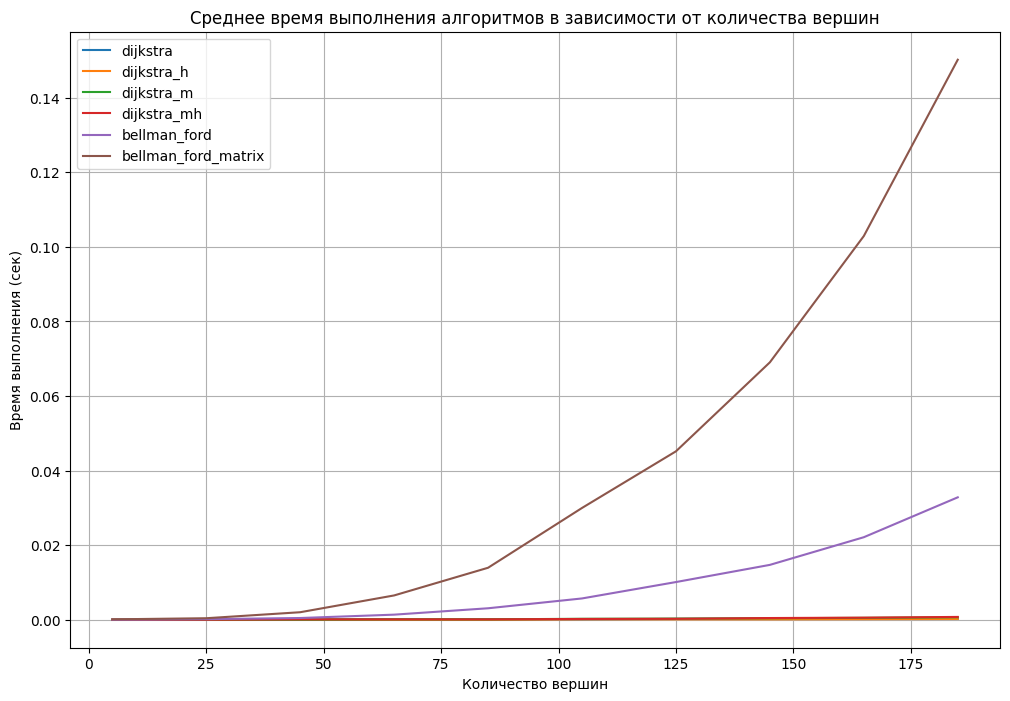

In [93]:
vertex_counts, avg_times = check_functions_time(max_vertices=200, p=0.5)

# Создаем график
plt.figure(figsize=(12, 8))

# Проходим по каждому алгоритму и строим график
for name in avg_times.keys():
    plt.plot(vertex_counts, avg_times[name], label=name)

# Настройка графика
plt.title('Среднее время выполнения алгоритмов в зависимости от количества вершин')
plt.xlabel('Количество вершин')
plt.ylabel('Время выполнения (сек)')
plt.legend()
plt.grid()
plt.xscale('linear')
plt.yscale('linear')
plt.show()
